# House Price Prediction


## Project Guide

- [Project Overview](#overview)
- [Data Cleaning & Exploration](#exploration)
- [Modeling with Linear Algebra](#linearAlgebra)
- [Modeling with Scikit Learn](#sklearn)
- [Conclusion](#conclusion)

<a id = "overview"></a>
## Promect Overview

This project uses [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) to discuss regression models for predicting continuous outputs. Before using `scikit-learn` package for modeling, the workbook will also include data exploration for data understanding and try to apply linear algebra algorithm with `numpy` package to reproduce modeling functions under the hood.

In [144]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.2, 10.0)

In [145]:
### Read in the data
df = pd.read_csv('../project-house-price-prediction/data/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Observe missing values
Alley, FireplaceQu, PoolQC, Fence, and MiscFeature have high portion of missing values.

In [146]:
# There are some columns with high percentage of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Observe the distribution of numeric columns
Some actions from observation:
1. Id should be removed from the dataset
2. TotalBsmtSF should be removed to avoid multicollinearity with BsmtFinSF1, bsmtFinSF2, and BsmtUnfSF
3. Transform YearBuilt, YearRemodAdd, and GarageYrBlt to age of building/remodel/garage.
4. At first glance, MoSold and YrSold don't seem to be very relevant to price. Examine the relationship between MoSold and YrSold to see if they are indicative.
5. Fill in the missing value in LotFrontage and MasVnrArea with mean value

In [147]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
df_numeric.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

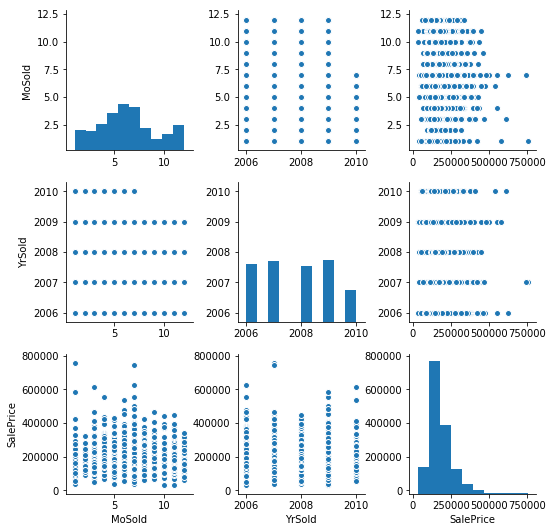

In [148]:
# MoSold and YrSold doesn't seem to be very indicative of SalesPrice
sns.pairplot(df[['MoSold', 'YrSold', 'SalePrice']])
plt.show()

#### Observe the correlation of numeric variables
1. GarageYrBlt and YearBuilt are highly correlated. GarageYrBlt could be removed.
2. TotRomsAbvGrd and GrLivArea are highly correlated. TotRomsAbvGrd could be removed.

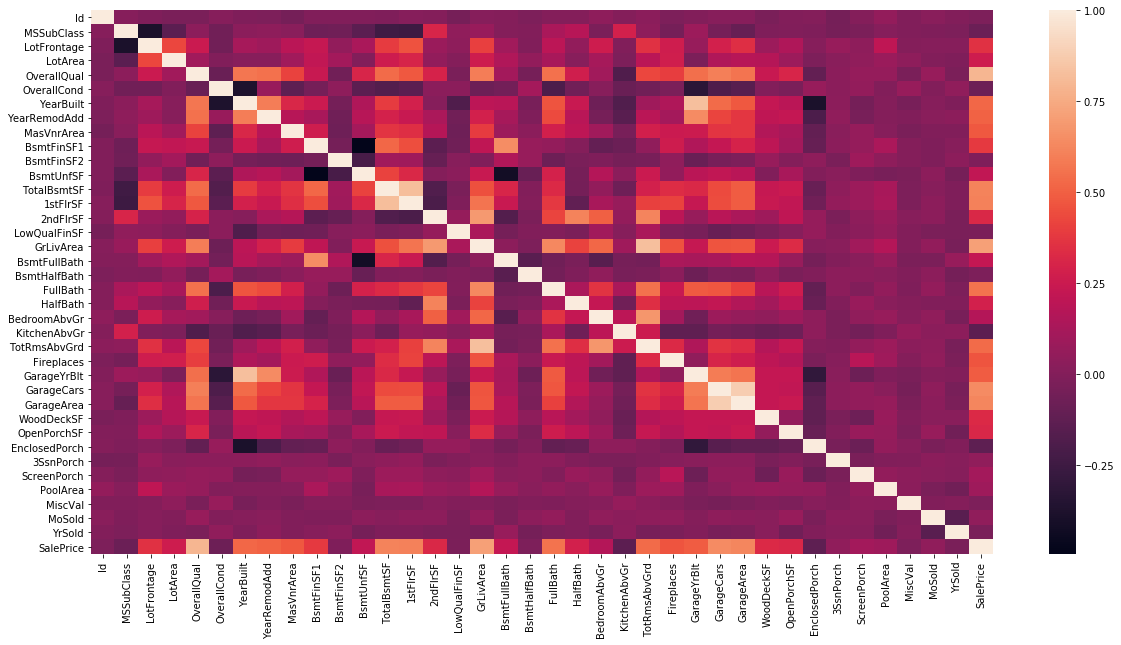

In [149]:
ax = sns.heatmap(df_numeric.corr())

#### Observe the value of non-numeric variables
Do not remove PoolQC, Fence, and MiscFeature as they might be good indicator of special house property.

In [150]:
df_nonNumeric = df.select_dtypes(include = ['object'])
df_nonNumeric.describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

#### Observe the relationship between non-numeric variables and SalePrice

In [151]:
# Tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [152]:
# for some reason tukeyhsd() doesn't work for CentralAir
df_nonNumeric2 = df_nonNumeric.drop(['CentralAir'], axis=1)
tukey_result = []
for col in df_nonNumeric2.columns:
    mc = MultiComparison(df['SalePrice'], df_nonNumeric[col].factorize()[0]) # use factorize to handel null values
    result = mc.tukeyhsd()
    tukey_result.append(sum(result.reject)) # get the number of pairs with significant difference

In [153]:
print('Columns with significant results:\n')
sig_nonNumeric_cols = df_nonNumeric2.columns[pd.Series(tukey_result) > 0]
print(sig_nonNumeric_cols)

Columns with significant results:

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [154]:
# pair-wise test for CentralAir
from scipy import stats

In [155]:
# Keep CentralAir
f, p = stats.f_oneway(df.SalePrice[df.CentralAir == 'Y'],
                      df.SalePrice[df.CentralAir == 'N'])
print('p value:', p)

p value: 1.80950615593e-22


#### Get the cleaned data set

In [162]:
# Age of building/remodle from YearBuilt and YearRemodAdd
df_numeric['AgeBuilding'] = 2012 - df_numeric['YearBuilt']
df_numeric['AgeRemodel'] = 2012 - df_numeric['YearRemodAdd']
# Fill NA
df_numeric = df_numeric.apply(lambda x: x.fillna(x.mean()), axis = 1)
# Columns to drop
drop_col = ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 
            'TotalBsmtSF', 'TotRmsAbvGrd', 
            'MoSold', 'YrSold', 'SalePrice']
df_numeric_clean = df_numeric.drop(drop_col, axis = 1)

In [164]:
df_nonNumeric_categorical = df_nonNumeric2.copy()
for col in df_nonNumeric2.columns:
    df_nonNumeric_categorical[col] = df_nonNumeric_categorical[col].fillna('NA').astype('category')
df_nonNumeric_categorical = pd.concat([df_nonNumeric_categorical, 
                                       df['CentralAir'].astype('category')], axis = 1)
df_nonNumeric_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null category
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType       1460 non-null category
ExterQual        1460 non-null category
ExterCond        1460 non-null category
Foundation       1460 non-null category
BsmtQual         1460 non-null category
BsmtCond     

In [168]:
X = pd.concat([df_numeric_clean, # Numreic columns   
               df_nonNumeric_categorical # non-Numeric columns
              ], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null float64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null float64
Fireplaces       1460 non-null float64
GarageCars       1460 non-null float64
GarageArea       1460 non-null float64
WoodDeckSF       1460 non-null floa

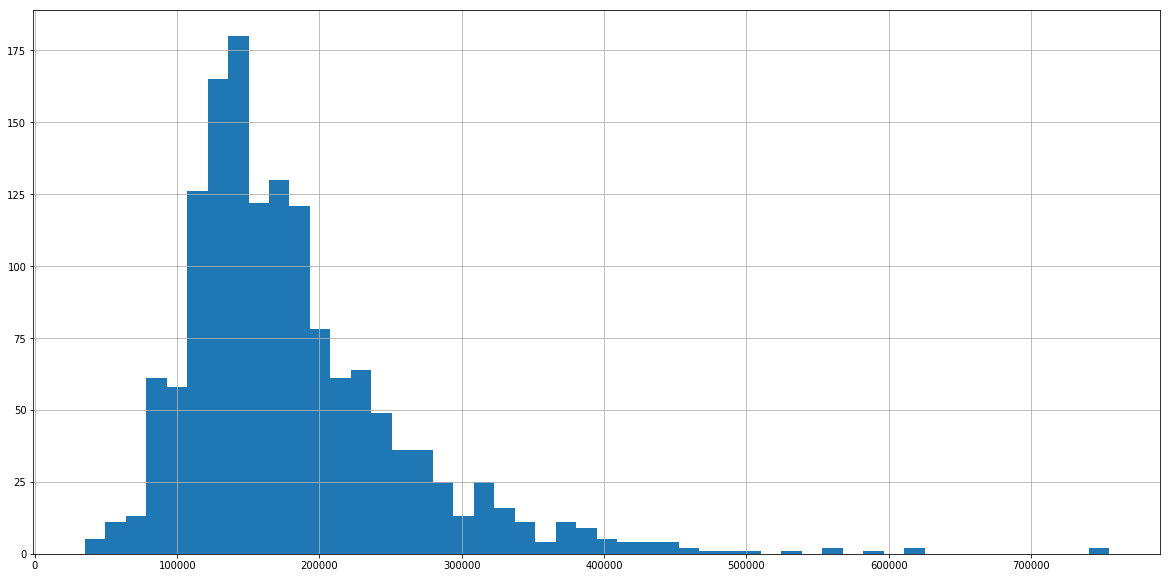

In [171]:
y = df.SalePrice
y.hist(bins=50)
plt.show()

<a id = "linearAlgebra"></a>
## Modeling with Linear Algebra]

<a id = "sklearn"></a>
## Modeling with Scikit Learn

<a id = "conclusion"></a>
## Conclusion